In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import requests
import sys
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import ast
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from string import punctuation
import nltk
from nltk.text import Text
from datetime import datetime, timedelta

In [2]:
df_24 = pd.read_csv('d:/Machine_Learning/Erdoes_Fall/project/PatData/After24hours.csv', index_col = False)

In [3]:
df_24.head()

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,...,redditor_for,upvotes,upvote_percent,num_comments,submission_id,upvotes_24,comment_after_1hour,total_number_comments,hot_val_24,upvote_perc_24
0,2,No,"China Evergrande Ends Talks on Hopson Deal, As...",https://old.reddit.com/r/wallstreetbets/commen...,https://www.bloomberg.com/news/articles/2021-1...,News,"""2021-10-20T15:25:08",9,70,AppyWappy,...,1618.662336,2,75,9,qc3dwu,8,11,15,999,71
1,3,No,Impact of Federal Legalization on TLRY,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,DD,"""2021-10-20T15:24:28",4,91,MichKOG,...,1861.732471,1,53,18,qc3de5,20,28,80,999,59
2,4,No,Novavax $NVAX is being investigated after big ...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.globenewswire.com/news-release/202...,News,"""2021-10-20T15:09:17",5,49,johnboycutter,...,2034.134827,5,78,10,qc30zw,20,10,13,999,84
3,5,No,I suggested this few weeks ago and I was ridic...,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/4oj1aea3emu71.jpg,Gain,"""2021-10-20T15:01:54",2,24,MgKx,...,1497.069590,20,81,12,qc2uxo,76,14,30,88,80
4,6,No,WISHtards today...,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/6mv5z7cctmu71.jpg,Meme,"""2021-10-20T16:27:23",99,22,Janto_2021,...,336.027425,20,92,3,qc4rq4,32171,63,598,7,92


In [5]:
from sklearn.model_selection import train_test_split

# Classification

In [163]:
df_24.describe()

,post_id,rising_val,hot_val,post_karma,comment_karma,redditor_for,upvotes,upvote_percent,num_comments,upvotes_24,comment_after_1hour,total_number_comments,hot_val_24,upvote_perc_24,popularity
count,3370.000000,3370.000000,3370.000000,3.370000e+03,3.370000e+03,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000,3370.000000
mean,2017.166172,50.570920,267.467953,2.264207e+04,1.226498e+04,981.826142,11.573887,84.202077,10.723145,684.966469,28.279228,197.908309,755.710089,81.894659,0.109199
std,1153.744744,47.396008,392.727394,1.099730e+05,6.720501e+04,1024.714747,15.504651,16.615529,54.190945,3650.494367,164.805523,1333.317200,412.724506,14.831753,0.311935
min,2.000000,0.000000,0.000000,1.000000e+00,-1.000000e+02,9.278449,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,1017.250000,3.000000,44.000000,7.200000e+01,8.425000e+01,275.887546,3.000000,75.000000,3.000000,12.000000,5.000000,8.000000,100.000000,75.000000,0.000000
50%,2024.500000,19.000000,69.000000,7.065000e+02,8.660000e+02,477.123270,7.000000,89.000000,5.000000,34.000000,10.000000,19.000000,999.000000,86.000000,0.000000
75%,3006.750000,99.000000,98.000000,5.555250e+03,5.262000e+03,1466.435481,14.000000,100.000000,8.000000,133.000000,18.000000,50.000000,999.000000,92.000000,0.000000
max,4037.000000,99.000000,999.000000,1.409321e+06,2.133322e+06,5877.725987,234.000000,100.000000,1392.000000,77558.000000,3290.000000,18737.000000,999.000000,100.000000,1.000000


the mean value for the upvotes_24 is 684. I will consider any post with less than 684 upvotes after 24h unpopular and
more than that popular

In [142]:
(df_24.upvotes_24[df_24.upvotes_24 >= 684])

368

In [141]:
(df_24.upvotes_24[df_24.upvotes_24 < 684])

3002

In [155]:
df_24.loc[df_24.upvotes_24 >= 684, 'popularity'] = 1
df_24.loc[df_24.upvotes_24 < 684, 'popularity'] = 0

# define the train test split with stratify = 'popularity'

In [165]:
df_train, df_test = train_test_split(df_24, test_size = 0.2, stratify = df_24['popularity'])

In [170]:
df_train.head()

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,...,Earnings_Thread,Gain,Loss,Meme,Modes,News,Shitpost,Technical_Analysis,Weekend_Discussion,Yolo
334,407,No,"$MVIS ROUND 2 , SI% near 20",https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,Discussion,"""2021-10-22T20:56:57",99,76,Runner20mph,...,0,0,0,0,0,0,0,0,0,0
2535,3018,No,$50k to $700k in a year 🚀,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/pvlt547coiy71.jpg,Gain,"""2021-11-09T06:48:46",0,28,kbbqking,...,0,1,0,0,0,0,0,0,0,0
1083,1319,No,GME spikes once every 2-3 months?,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,Discussion,"""2021-10-28T17:38:09",99,999,realaccountforsure,...,0,0,0,0,0,0,0,0,0,0
890,1074,No,"Daily Discussion Thread for October 27, 2021",https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,Daily Discussion,"""2021-10-27T10:00:22",99,0,OPINION_IS_UNPOPULAR,...,0,0,0,0,0,0,0,0,0,0
2686,3198,No,Looking for An F... Or M as miracle.,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/4werxzx0xmy71.jpg,Loss,"""2021-11-09T21:04:35",5,77,_STIFFL3R_,...,0,0,1,0,0,0,0,0,0,0


In [169]:
# Here I one_hot_encode it
df_train[['DD','Daily_Discussion','Discussion','Earnings_Thread','Gain','Loss','Meme',
       'Modes','News','Shitpost','Technical_Analysis','Weekend_Discussion','Yolo']] = pd.get_dummies(df_train.flair)[['DD', 'Daily Discussion', 'Discussion', 'Earnings Thread', 'Gain',
       'Loss', 'Meme', 'Mods', 'News', 'Shitpost',
       'Technical Analysis', 'Weekend Discussion', 'YOLO']].copy()


D:\Anaconda\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


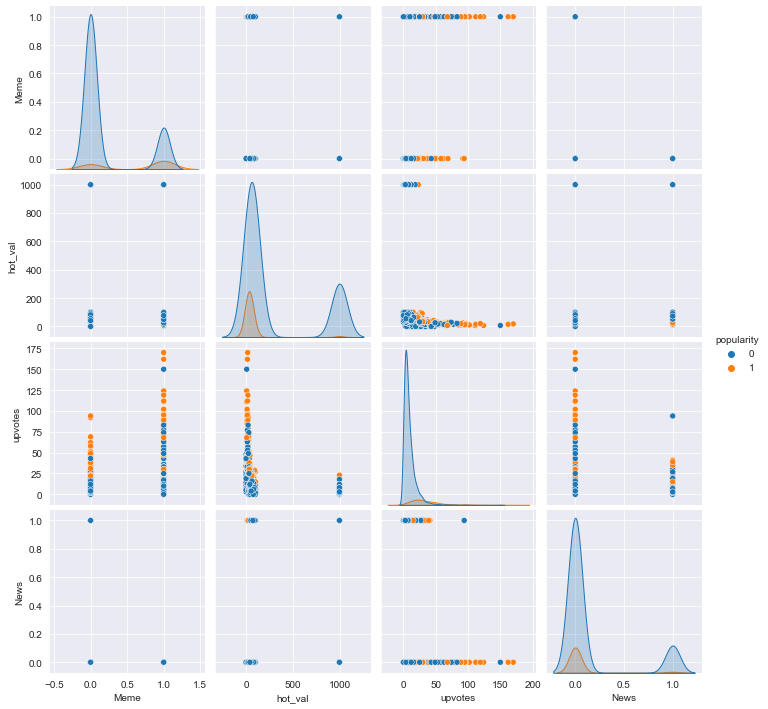

In [515]:
sns.pairplot(df_train, vars = ['Meme', 'hot_val','upvotes','News'], hue = 'popularity')

# First a KNeighborsClassifier

In [158]:
from sklearn.neighbors import KNeighborsClassifier

In [378]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [175]:
df_train.popularity.value_counts()

0    2402
1     294
Name: popularity, dtype: int64

In [424]:
# a quick test how KNN performs
features = ['hot_val','upvotes','DD','Daily_Discussion','Gain','Loss','Meme',
       'Modes','News','Technical_Analysis','Weekend_Discussion','Discussion','Yolo']
KNN_clf = KNeighborsClassifier(n_neighbors = 5)
KNN_clf.fit(df_train[features], df_train['popularity'])
#KNN_predicted = KNN_clf.predict(df_train[features])
accu = accuracy_score(KNN_clf.predict(df_train[features]), df_train['popularity'])
roc_value = roc_auc_score(df_train['popularity'],KNN_clf.predict_proba(df_train[features])[:,1] )
fprs, tprs, thresholds = roc_curve(df_train['popularity'],KNN_clf.predict_proba(df_train[features])[:,1] )

In [425]:
roc_value

0.957468832662124

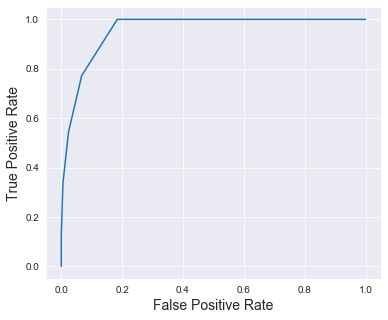

In [429]:
plt.figure(figsize = (6,5))
plt.plot(fprs, tprs)
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
#plt.savefig()
plt.show()

Here I would like to find the signigicant features:

In [183]:
def powerset_no_empty(s):
    power_set = []
    x = len(s)
    for i in range(1 << x):
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
            
    return power_set[1:]

In [228]:
non_categorical = powerset_no_empty(['rising_val', 'hot_val','post_karma','comment_karma', 'redditor_for','num_comments','upvotes'])

In [234]:
#this part gives you all possible combinations without categorical variable

all_models = pd.Series(non_categorical).append(pd.Series(['baseline']), ignore_index = True)

In [240]:
all_models[127]

'baseline'

In [186]:
from sklearn.model_selection import StratifiedKFold

In [241]:
# Here I run a cross validation to select best model
features = ['post_id', 'active_track', 'title', 'comment_url', 'link_url', 'flair',
       'submit_time', 'rising_val', 'hot_val', 'username', 'post_karma',
       'comment_karma', 'redditor_for', 'upvotes', 'upvote_percent',
       'num_comments', 'submission_id', 'upvotes_24', 'comment_after_1hour',
       'total_number_comments', 'hot_val_24', 'upvote_perc_24',
       'DD', 'Daily_Discussion', 'Discussion', 'Earnings_Thread', 'Gain',
       'Loss', 'Meme', 'Modes', 'News', 'Shitpost', 'Technical_Analysis',
       'Weekend_Discussion', 'Yolo']
kf = StratifiedKFold(10)
cv_accuracy_KNN = np.empty((10,len(all_models)))
clf = KNeighborsClassifier(5)
i = 0
# Perform CV
for train_index, test_index in kf.split(df_train[features],df_train['popularity']):
    # Get the cv train test split
    df_train_train = df_train.iloc[train_index]
    df_holdout = df_train.iloc[test_index]
    # For each possible model
    for j in range(len(all_models)):
        # Cloning the regression makes a fresh regression 
        if all_models[j] == "baseline":
            cv_accuracy_KNN[i,j] = 0.5
        else:
            # model for each run
            clone_clf = clone(clf)

            # fit the model
            clone_clf.fit(df_train_train[all_models[j]], df_train_train['popularity'])
            
            pred = clone_clf.predict(df_holdout[all_models[j]])
        
            cv_accuracy_KNN[i,j] = accuracy_score(df_holdout['popularity'], pred)
    i = i + 1

In [244]:
all_models[np.argmax(np.mean(cv_accuracy_KNN, axis = 0))]

['hot_val', 'upvotes']

I find the following features to be the most relevant ones:

In [491]:
selected_features = ['hot_val','upvotes','DD','Daily_Discussion','Discussion','Gain','Loss','Meme',
       'Modes','News','Technical_Analysis','Weekend_Discussion','Yolo']

In [528]:
# Here I run a cross validation to select best number of neighbors
features = ['post_id', 'active_track', 'title', 'comment_url', 'link_url', 'flair',
       'submit_time', 'rising_val', 'hot_val', 'username', 'post_karma',
       'comment_karma', 'redditor_for', 'upvotes', 'upvote_percent',
       'num_comments', 'submission_id', 'upvotes_24', 'comment_after_1hour',
       'total_number_comments', 'hot_val_24', 'upvote_perc_24',
       'DD', 'Daily_Discussion', 'Discussion', 'Earnings_Thread', 'Gain',
       'Loss', 'Meme', 'Modes', 'News', 'Shitpost', 'Technical_Analysis',
       'Weekend_Discussion', 'Yolo']
n_neighbors = range(3,50)
KNN_accuracy = np.empty((10,len(n_neighbors)))
kf = StratifiedKFold(10)
KNN_roc = np.empty((10,len(n_neighbors)))
i = 0
# Perform CV
for train_index, test_index in kf.split(df_train[features],df_train['popularity']):
    # Get the cv train test split
    df_train_train = df_train.iloc[train_index]
    df_holdout = df_train.iloc[test_index]
    # For each possible model
    j = 0
    for neighbor in n_neighbors:
            # model for each run
        

            # fit the model
        KNN = KNeighborsClassifier(neighbor)

            # fit the model
        KNN.fit(df_train_train[selected_features], df_train_train['popularity'])
            
        pred = KNN.predict(df_holdout[selected_features])
        
        KNN_accuracy[i,j] = accuracy_score(df_holdout['popularity'], pred)
        KNN_roc[i,j] = roc_auc_score(df_holdout['popularity'], KNN.predict_proba(df_holdout[selected_features])[:,1])
        j = j + 1
    i = i + 1

In [529]:
np.mean(KNN_accuracy, axis = 0)

array([0.90132314, 0.90502685, 0.90762633, 0.90763046, 0.9057786 ,
       0.90763459, 0.90466336, 0.91023406, 0.90689522, 0.91023682,
       0.91060856, 0.91097756, 0.91023682, 0.90986369, 0.90838359,
       0.91023269, 0.90948919, 0.90948644, 0.90911882, 0.90911882,
       0.91097343, 0.90985956, 0.91097205, 0.91023269, 0.9109748 ,
       0.91060443, 0.91097205, 0.91022993, 0.91208316, 0.91245766,
       0.9139419 , 0.91282666, 0.91245629, 0.91245629, 0.91356877,
       0.9131984 , 0.9131984 , 0.9128239 , 0.91171279, 0.91356464,
       0.91282528, 0.91282666, 0.91245629, 0.91245904, 0.91245629,
       0.91394052, 0.9131984 ])

In [530]:
np.mean(KNN_roc, axis = 0)

array([0.80342204, 0.82642343, 0.83568365, 0.83930405, 0.84649805,
       0.85307613, 0.86113395, 0.86521534, 0.86842944, 0.87160194,
       0.87207617, 0.87252352, 0.87629298, 0.8777156 , 0.87754463,
       0.87715079, 0.87948952, 0.87892701, 0.87952456, 0.87975086,
       0.8827507 , 0.88511017, 0.88830967, 0.88793586, 0.88832001,
       0.88736667, 0.88736626, 0.88669674, 0.88640824, 0.88773281,
       0.88636733, 0.8875316 , 0.88836005, 0.89186017, 0.89116656,
       0.89045164, 0.89104988, 0.89012737, 0.88896244, 0.88911037,
       0.88915485, 0.88863552, 0.88839019, 0.88753856, 0.88791269,
       0.8886748 , 0.88743117])

In [531]:
print('best KNN model with best accuracy has {} number of neighbors'.format(n_neighbors[np.argmax(np.mean(KNN_accuracy, axis = 0))]))

best KNN model has 33 number of neighbors


In [533]:
print('best KNN model with best ROC score has {} number of neighbors'.format(n_neighbors[np.argmax(np.mean(KNN_roc, axis = 0))]))

best KNN model with best ROC score has 36 number of neighbors


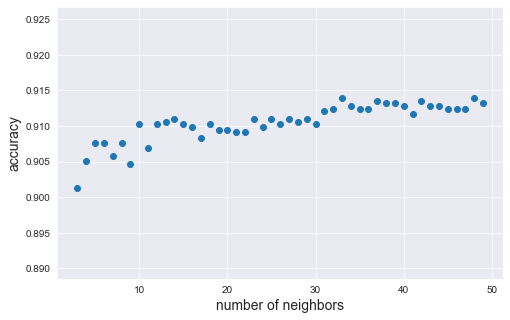

In [534]:
plt.figure(figsize = (8,5))
plt.scatter(range(3,50), np.mean(KNN_accuracy, axis = 0))
plt.xlabel('number of neighbors', fontsize = 14)
plt.ylabel('accuracy', fontsize = 14)
plt.show()

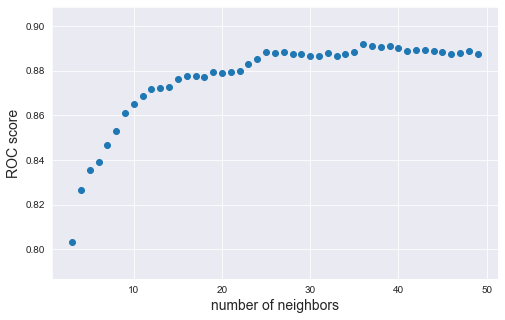

In [535]:
plt.figure(figsize = (8,5))
plt.scatter(range(3,50), np.mean(KNN_roc, axis = 0))
plt.xlabel('number of neighbors', fontsize = 14)
plt.ylabel('ROC score', fontsize = 14)
plt.show()

In [251]:
from sklearn.linear_model import LogisticRegression

# SVM classifier

In [310]:
from sklearn.svm import SVC

In [320]:
clf = SVC(C=1)
clf.fit(df_train[selected_features], df_train['popularity'])
pred = clf.predict(df_train[selected_features])
accuracy_score(df_train['popularity'], pred)

0.896513353115727

In [329]:
# Here I run a cross validation to select best number of neighbors

C_values = [0.001,0.01,0.1,1,10,20,50,60,80,100]
cv_svc_accuracy = np.empty((10,len(C_values)))
kf = StratifiedKFold(10)
#KNN_roc = p.empty((10,len(n_neighbors)))
i = 0
# Perform CV
for train_index, test_index in kf.split(df_train[selected_features],df_train['popularity']):
    # Get the cv train test split
    df_train_train = df_train.iloc[train_index]
    df_holdout = df_train.iloc[test_index]
    # For each possible model
    j = 0
    for C in C_values:
     
            # fit the model
        svc_clf = SVC(C = C)

            # fit the model
        svc_clf.fit(df_train_train[selected_features], df_train_train['popularity'])
            
        pred = svc_clf.predict(df_holdout[selected_features])
        
        cv_svc_accuracy[i,j] = accuracy_score(df_holdout['popularity'], pred)
        #KNN_roc[i,j] = accuray_score(df_holdout['popularity'], pred)
        j = j + 1
    i = i + 1

In [330]:
np.mean(cv_svc_accuracy, axis = 0)

array([0.8909514 , 0.8909514 , 0.8909514 , 0.89539997, 0.90022029,
       0.90059204, 0.90503649, 0.90429575, 0.90503649, 0.90466474])

In [331]:
C_values[np.argmax(np.mean(cv_svc_accuracy, axis = 0))]

50

# Decision Tree and Random Forest

In [328]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [333]:
# with cross validation I will find the depth

depths = range(1,31)
cv_DT_accuracy = np.zeros((10, len(depths)))
kf = StratifiedKFold(10)
#KNN_roc = p.empty((10,len(n_neighbors)))
i = 0
# Perform CV
for train_index, test_index in kf.split(df_train[features],df_train['popularity']):
    # Get the cv train test split
    df_train_train = df_train.iloc[train_index]
    df_holdout = df_train.iloc[test_index]
    # For each possible model
    j = 0
    for depth in depths:
     
            # fit the model
        tree = DecisionTreeClassifier(max_depth=depth)

            # fit the model
        tree.fit(df_train_train[selected_features], df_train_train['popularity'])
            
        pred = tree.predict(df_holdout[selected_features])
        
        cv_DT_accuracy[i,j] = accuracy_score(df_holdout['popularity'], pred)
        #KNN_roc[i,j] = accuray_score(df_holdout['popularity'], pred)
        j = j + 1
    i = i + 1

In [334]:
np.mean(cv_DT_accuracy, axis=0)

array([0.8909514 , 0.9109748 , 0.91023269, 0.90800771, 0.90837946,
       0.90503511, 0.90281151, 0.89761118, 0.89427922, 0.88982239,
       0.88796778, 0.88463858, 0.87944513, 0.8798155 , 0.87907201,
       0.88167149, 0.87462481, 0.87647666, 0.8753628 , 0.87462619,
       0.87574005, 0.87462619, 0.87536417, 0.87425306, 0.88018725,
       0.87685116, 0.87573592, 0.87722566, 0.87685254, 0.87351095])

In [336]:
print('the best decision tree has a depth value of {}'.format(depths[np.argmax(np.mean(cv_DT_accuracy, axis=0))]))

the best decision tree has a depth value of 2


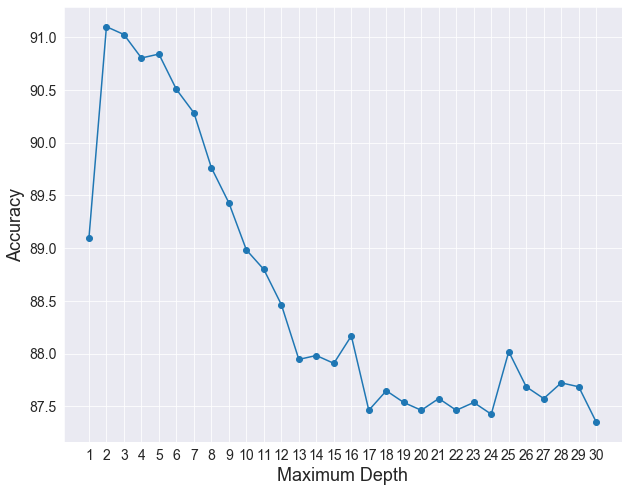

In [337]:
plt.figure(figsize=(10,8))


plt.plot(depths, 100*np.mean(cv_DT_accuracy, axis=0), '-o')

plt.xlabel("Maximum Depth", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(depths,fontsize=14)

plt.show()


In [410]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(df_train[selected_features], df_train['popularity'])
pred = tree_clf.predict_proba(df_train[selected_features])[:,1]
fprs, tprs, thresholds = roc_curve(df_train['popularity'],pred)
conf_mat = confusion_matrix(1 *(pred >= 0.5), df_train['popularity'])

In [411]:
conf_mat

array([[2344,  175],
       [  58,  119]], dtype=int64)

In [345]:
# with cross validation I will find number of trees for the random forest

num_of_trees = [5,10, 50, 100, 250, 500, 1000]
cv_RF_accuracy = np.zeros((10, len(num_of_trees)))
kf = StratifiedKFold(10)
#KNN_roc = p.empty((10,len(n_neighbors)))
i = 0
# Perform CV
for train_index, test_index in kf.split(df_train[features],df_train['popularity']):
    # Get the cv train test split
    df_train_train = df_train.iloc[train_index]
    df_holdout = df_train.iloc[test_index]
    # For each possible model
    j = 0
    for num_trees in num_of_trees:
     
            # fit the model
        RF = RandomForestClassifier(max_depth=2, n_estimators = num_trees)

            # fit the model
        RF.fit(df_train_train[selected_features], df_train_train['popularity'])
            
        pred = RF.predict(df_holdout[selected_features])
        
        cv_RF_accuracy[i,j] = accuracy_score(df_holdout['popularity'], pred)
        #KNN_roc[i,j] = accuray_score(df_holdout['popularity'], pred)
        j = j + 1
    i = i + 1

In [346]:
np.mean(cv_RF_accuracy, axis = 0)

array([0.90022305, 0.89057965, 0.8909514 , 0.88946441, 0.8909514 ,
       0.8909514 , 0.8909514 ])

seems that DecisionTreeClassifier performs better than the RandomForestClassifier

# Logistic Regression

In [348]:

# Here I run a cross validation to select best number of neighbors

C_values = [0.001,0.01,0.1,1,10,20,50,60,80,100]
cv_Log_accuracy = np.empty((10,len(C_values)))
kf = StratifiedKFold(10)
#KNN_roc = p.empty((10,len(n_neighbors)))
i = 0
# Perform CV
for train_index, test_index in kf.split(df_train[selected_features],df_train['popularity']):
    # Get the cv train test split
    df_train_train = df_train.iloc[train_index]
    df_holdout = df_train.iloc[test_index]
    # For each possible model
    j = 0
    for C in C_values:
     
            # fit the model
        log_clf = LogisticRegression(C = C, max_iter = 100000)

            # fit the model
        log_clf.fit(df_train_train[selected_features], df_train_train['popularity'])
            
        pred = log_clf.predict(df_holdout[selected_features])
        
        cv_Log_accuracy[i,j] = accuracy_score(df_holdout['popularity'], pred)
        #KNN_roc[i,j] = accuray_score(df_holdout['popularity'], pred)
        j = j + 1
    i = i + 1


In [349]:
np.mean(cv_Log_accuracy, axis = 0)

array([0.9109693 , 0.91208041, 0.91245215, 0.91171004, 0.91245078,
       0.91245078, 0.91245078, 0.91245078, 0.91245078, 0.91245078])

It seems that C = 0.1 is the best value with accuracy of 0.9124

# adaboost classifier

In [357]:
from sklearn.ensemble import AdaBoostClassifier

In [359]:

num_learners = range(1,51)

## Make an array to hold your cross validation results here
ada_accuracy = np.zeros((10, len(num_learners)))

## fill in the code for a 5-fold cross-validation object here
kfold = StratifiedKFold(10)


i=0
for train_index, test_index in kf.split(df_train[selected_features],df_train['popularity']):
    # Get the cv train test split
    df_train_train = df_train.iloc[train_index]
    df_holdout = df_train.iloc[test_index]

    
    # here we loop through the different values for n_estimators
    for j in num_learners:
        # make the AdaBoostClassifier object here
        ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=j, learning_rate=1)
        
        # fit that object here
        ada.fit(df_train_train[selected_features], df_train_train['popularity'])
        pred = ada.predict(df_holdout[selected_features])
        # record the performance in your array here
        ada_accuracy[i,j-1] = accuracy_score(df_holdout['popularity'], pred)

    i = i + 1

In [360]:
np.mean(ada_accuracy, axis = 0)

array([0.91023269, 0.91023406, 0.90912433, 0.90912571, 0.90801184,
       0.9072711 , 0.90652898, 0.90726972, 0.90652761, 0.90503924,
       0.90429575, 0.90206802, 0.90243976, 0.90207077, 0.90206526,
       0.90540823, 0.90354812, 0.90132039, 0.90058103, 0.90206389,
       0.90169076, 0.90243563, 0.90206251, 0.90020928, 0.90169352,
       0.90354812, 0.90392124, 0.90355087, 0.90243839, 0.9013259 ,
       0.89873331, 0.89799119, 0.89724494, 0.89724907, 0.90021754,
       0.90021616, 0.89947818, 0.89687595, 0.89688008, 0.89539171,
       0.89316674, 0.89427922, 0.89316398, 0.89280187, 0.8935495 ,
       0.89243013, 0.89243288, 0.89132039, 0.89131764, 0.89428611])

In [361]:
print('number of estimator with best accuracy is {}'.format(num_learners[np.argmax(np.mean(ada_accuracy, axis=0))]))

number of estimator with best accuracy is 2


It seems that adaboost is not much better so I skip it

# VoterModels

In [350]:
from sklearn.ensemble import VotingClassifier

In [355]:
voter_clf = VotingClassifier([('svc', SVC(C = 50, probability = True)), ('KNN', KNeighborsClassifier(n_neighbors = 12)),
                       ('log_reg', LogisticRegression(C = 0.1, max_iter = 100000)),
                       ('DT', DecisionTreeClassifier(max_depth=2))], voting = 'soft')
voter_clf.fit(df_train[selected_features], df_train['popularity'])
pred = voter_clf.predict(df_train[selected_features])
accuracy_score(pred, df_train['popularity'])

0.9154302670623146

# By cross validation I will decide which model eventually works better

In [536]:
cv_accs = np.zeros((10,5))
cv_rocs = np.zeros((10,5))
svc_clf = SVC(C = 50, probability = True)

KNN_clf = KNeighborsClassifier(n_neighbors = 12)

log_reg_clf = LogisticRegression(C = 0.1, max_iter = 10000)

DT_clf = DecisionTreeClassifier(max_depth = 2)
voting_clf = voter_clf = VotingClassifier([('svc', SVC(C = 50, probability = True)), ('KNN', KNeighborsClassifier(n_neighbors = 36)),
                       ('log_reg', LogisticRegression(C = 0.1, max_iter = 100000)),
                       ('DT', DecisionTreeClassifier(max_depth=2))], voting = 'soft')
i = 0
for train_index, test_index in kf.split(df_train[selected_features],df_train['popularity']):
    # Get the cv train test split
    df_train_train = df_train.iloc[train_index]
    df_holdout = df_train.iloc[test_index]
    
    svc_clf_clone = clone(svc_clf)
    KNN_clf_clone = clone(KNN_clf)
    log_reg_clf_clone = clone(log_reg_clf)
    DT_clf_clone = clone(DT_clf)
    voting_clf_clone = clone(voting_clf)
    
    svc_clf_clone.fit(df_train_train[selected_features], df_train_train['popularity'])
    KNN_clf_clone.fit(df_train_train[selected_features], df_train_train['popularity'])
    log_reg_clf_clone.fit(df_train_train[selected_features], df_train_train['popularity'])
    DT_clf_clone.fit(df_train_train[selected_features], df_train_train['popularity'])
    voting_clf_clone.fit(df_train_train[selected_features], df_train_train['popularity'])
    
    cv_accs[i,0] = accuracy_score(df_holdout['popularity'], svc_clf_clone.predict(df_holdout[selected_features]))
    cv_accs[i,1] = accuracy_score(df_holdout['popularity'], KNN_clf_clone.predict(df_holdout[selected_features]))
    cv_accs[i,2] = accuracy_score(df_holdout['popularity'], log_reg_clf_clone.predict(df_holdout[selected_features]))
    cv_accs[i,3] = accuracy_score(df_holdout['popularity'], DT_clf_clone.predict(df_holdout[selected_features]))
    cv_accs[i,4] = accuracy_score(df_holdout['popularity'], voting_clf_clone.predict(df_holdout[selected_features]))
    
    cv_rocs[i,0] = roc_auc_score(df_holdout['popularity'], svc_clf_clone.predict_proba(df_holdout[selected_features])[:,1])
    cv_rocs[i,1] = roc_auc_score(df_holdout['popularity'], KNN_clf_clone.predict_proba(df_holdout[selected_features])[:,1])
    cv_rocs[i,2] = roc_auc_score(df_holdout['popularity'], log_reg_clf_clone.predict_proba(df_holdout[selected_features])[:,1])
    cv_rocs[i,3] = roc_auc_score(df_holdout['popularity'], DT_clf_clone.predict_proba(df_holdout[selected_features])[:,1])
    cv_rocs[i,4] = roc_auc_score(df_holdout['popularity'], voting_clf_clone.predict_proba(df_holdout[selected_features])[:,1])
    
    i = i + 1
    

In [537]:
np.mean(cv_accs, axis = 0)

array([0.90503649, 0.91023682, 0.91245215, 0.9109748 , 0.9113438 ])

In [538]:
np.mean(cv_rocs, axis = 0)

array([0.84925298, 0.87160194, 0.90451615, 0.87844867, 0.90704272])

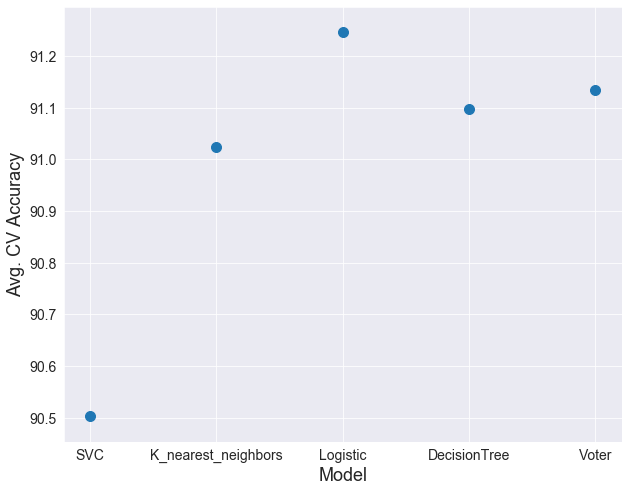

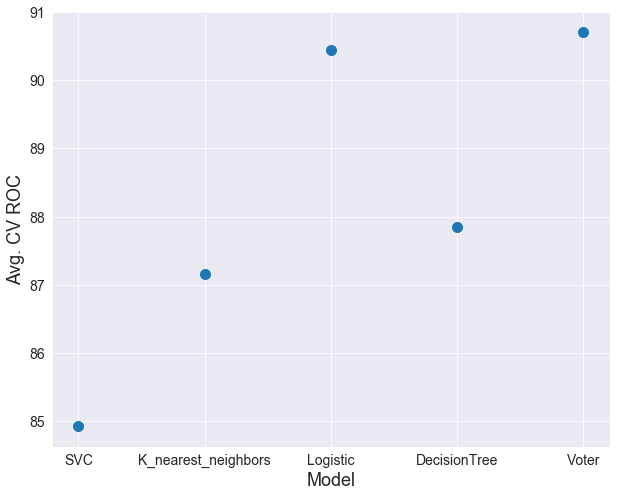

In [539]:
plt.figure(figsize=(10,8))

plt.scatter(range(5), 100*np.mean(cv_accs, axis=0), s=100)

plt.xlabel("Model", fontsize=18)
plt.ylabel("Avg. CV Accuracy", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(5), ['SVC', 'K_nearest_neighbors', 'Logistic','DecisionTree','Voter'], fontsize=14)

plt.show()

plt.figure(figsize=(10,8))

plt.scatter(range(5), 100*np.mean(cv_rocs, axis=0), s=100)

plt.xlabel("Model", fontsize=18)
plt.ylabel("Avg. CV ROC", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(5), ['SVC', 'K_nearest_neighbors', 'Logistic','DecisionTree','Voter'], fontsize=14)

plt.show()

# final test on the test samples

In [476]:
# Here I one_hot_encode it
pd.get_dummies(df_test.flair).columns

Index(['DD', 'Daily Discussion', 'Discussion', 'Gain', 'Loss', 'Meme', 'Mods',
       'News', 'Technical Analysis', 'YOLO'],
      dtype='object')

In [493]:
selected_features

['hot_val',
 'upvotes',
 'DD',
 'Daily_Discussion',
 'Discussion',
 'Gain',
 'Loss',
 'Meme',
 'Modes',
 'News',
 'Technical_Analysis',
 'Weekend_Discussion',
 'Yolo']

In [499]:
# Here I one_hot_encode it
df_test[['DD','Daily_Discussion','Discussion','Gain', 'Loss', 'Meme', 'Modes',
       'News', 'Technical_Analysis', 'Yolo']] = pd.get_dummies(df_test.flair)[['DD','Daily Discussion', 'Discussion', 'Gain', 'Loss', 'Meme', 'Mods',
       'News', 'Technical Analysis', 'YOLO']].copy()

In [507]:
df_test.drop('Mods', axis = 1,inplace = True)

In [508]:
df_test.head()

,post_id,active_track,title,comment_url,link_url,flair,submit_time,rising_val,hot_val,username,...,Discussion,Gain,Loss,Meme,News,Technical Analysis,Daily_Discussion,Technical_Analysis,Yolo,Modes
860,1037,No,The Current State of the Meme: Dying Off or Ca...,https://old.reddit.com/r/wallstreetbets/commen...,https://old.reddit.com/r/wallstreetbets/commen...,Technical Analysis,"""2021-10-27T00:46:17",99,102,MichaelScarnOnCrack,...,0,0,0,0,0,1,0,1,0,0
3191,3806,No,"$400 to $12,000 with Mara",https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/c66pg2o198z71.jpg,Gain,"""2021-11-12T20:49:22",0,29,Sidatedchickenwing,...,0,1,0,0,0,0,0,0,0,0
2392,2860,No,My loss porn since early 2019- My Profile Pic ...,https://old.reddit.com/r/wallstreetbets/commen...,https://i.redd.it/mm61b4q0qey71.png,Loss,"""2021-11-08T17:31:30",2,40,Mookypooks,...,0,0,1,0,0,0,0,0,0,0
880,1062,No,Lots of Ceos/Upper Mgmt paper handsing compani...,https://old.reddit.com/r/wallstreetbets/commen...,http://openinsider.com/screener?s=\u0026o=\u00...,News,"""2021-10-27T04:01:28",2,102,chasmflip,...,0,0,0,0,1,0,0,0,0,0
563,693,No,Wish definitely will be next amazon and I won’...,https://old.reddit.com/r/wallstreetbets/commen...,https://www.reddit.com/gallery/qfj56j,Gain,"""2021-10-25T15:24:30",99,44,lucianosocrates76,...,0,1,0,0,0,0,0,0,0,0


In [501]:
selected_features_test = ['hot_val','upvotes','DD','Daily_Discussion','Discussion','Gain', 'Loss', 'Meme', 'Modes',
       'News', 'Technical_Analysis', 'Yolo']

In [540]:
voting_clf = voter_clf = VotingClassifier([('svc', SVC(C = 50, probability = True)), ('KNN', KNeighborsClassifier(n_neighbors = 36)),
                       ('log_reg', LogisticRegression(C = 0.1, max_iter = 100000)),
                       ('DT', DecisionTreeClassifier(max_depth=2))], voting = 'soft')
voting_clf.fit(df_train[selected_features_test], df_train['popularity'])
test_accuracy = accuracy_score(df_test['popularity'], voting_clf.predict(df_test[selected_features_test])) 
test_roc = roc_auc_score(df_test['popularity'], voting_clf.predict_proba(df_test[selected_features_test])[:,1])
fprs, tprs, thresholds = roc_curve(df_test['popularity'], voting_clf.predict_proba(df_test[selected_features_test])[:,1])

In [541]:
test_accuracy

0.913946587537092

In [542]:
test_roc

0.8978153153153152

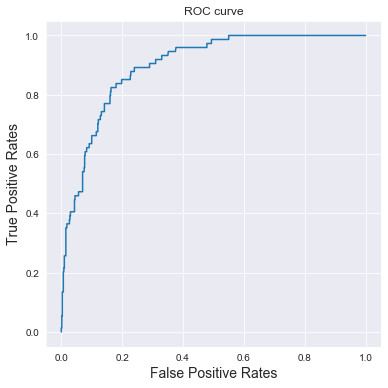

In [543]:
plt.figure(figsize = (6,6))
plt.plot(fprs, tprs)
plt.xlabel('False Positive Rates', fontsize = 14)
plt.ylabel('True Positive Rates', fontsize = 14)
plt.title('ROC curve')

plt.show()